# Unit 5 - Financial Planning

In [2]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [3]:
# Load .env enviroment variables
load_dotenv()

False

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [6]:
# Set current amount of crypto assets
# YOUR CODE HERE!
btc_assets=1.2
eth_assets=5.3
monthly_income = 12000

In [7]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [8]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_r = requests.get(btc_url).json()   # BTC Request
btc_p = btc_r['data']['1']['quotes']['USD']['price']   # BTC Price


# Fetch current ETH price
# YOUR CODE HERE!
eth_r = requests.get(eth_url).json()   # ETH Request
eth_p = eth_r['data']['1027']['quotes']['USD']['price']   # ETH Price


# Compute current value of my crpto
# YOUR CODE HERE!
btc_value = btc_assets * btc_p
eth_value = eth_assets * eth_p

total_value = btc_value + eth_value


# Print current crypto wallet balance
print(f"The current value of your {btc_assets} BTC is ${btc_value:0.2f}")
print(f"The current value of your {eth_assets} ETH is ${eth_value:0.2f}")

The current value of your 1.2 BTC is $82916.40
The current value of your 5.3 ETH is $19916.02


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 110

In [11]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_APY_key = "PKFQADTK5D6QEUAYNQ4R"
alpaca_secret_key = "Vvumuv4i0tb4MkIMj2OgUQZcaFI4IqR7oCh42gfp"

# Create the Alpaca API object
# YOUR CODE HERE! 
alpaca = tradeapi.REST(alpaca_APY_key, alpaca_secret_key, api_version="v2")

In [81]:
# Format current date as ISO format
# YOUR CODE HERE!
from datetime import datetime

current_date = pd.Timestamp("2024-05-24", tz="America/New_York").isoformat()
start = pd.Timestamp("2024-05-24", tz="America/New_York").isoformat()
end = pd.Timestamp("2024-05-24", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = current_date,
    end = current_date
).df
# display(df_portfolio)

df_portfolio_year = alpaca.get_bars(
    tickers,
    timeframe,
    start = start,
    end = end
).df
# display(df_portfolio_year)

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_portfolio_year[df_portfolio_year['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio_year[df_portfolio_year['symbol']=='SPY'].drop('symbol', axis=1)
# display(AGG)
# display(SPY)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio_year = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
# YOUR CODE HERE!
display(df_portfolio_year.head(5))
display(df_portfolio_year.tail(5))

AGG                                            \
                           close   high    low trade_count   open   volume   
timestamp                                                                    
2024-05-24 04:00:00+00:00  96.58  96.62  96.39       13806  96.43  3072140   

                                         SPY                               \
                                vwap   close    high      low trade_count   
timestamp                                                                   
2024-05-24 04:00:00+00:00  96.533397  529.44  530.27  526.881      328934   

                                                         
                             open    volume        vwap  
timestamp                                                
2024-05-24 04:00:00+00:00  527.85  41331076  528.914223

AGG                                            \
                           close   high    low trade_count   open   volume   
timestamp                                                                    
2024-05-24 04:00:00+00:00  96.58  96.62  96.39       13806  96.43  3072140   

                                         SPY                               \
                                vwap   close    high      low trade_count   
timestamp                                                                   
2024-05-24 04:00:00+00:00  96.533397  529.44  530.27  526.881      328934   

                                                         
                             open    volume        vwap  
timestamp                                                
2024-05-24 04:00:00+00:00  527.85  41331076  528.914223

In [13]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
df_close_prices = pd.DataFrame()
df_close_prices["AGG"] = df_portfolio_year["AGG"]["close"]
df_close_prices["SPY"] = df_portfolio_year["SPY"]["close"]

# Print AGG and SPY close prices
# print(f"Current AGG closing price: ${agg_close_price}")
# print(f"Current SPY closing price: ${spy_close_price}")
print(df_close_prices)

                             AGG     SPY
timestamp                               
2024-05-24 04:00:00+00:00  96.58  529.44


In [14]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg = 200
my_spy = 110

agg_price = df_close_prices["AGG"][0]
spy_price = df_close_prices["SPY"][0]

my_agg_value = my_agg * agg_price
my_spy_value = my_spy * spy_price


# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 110 SPY shares is $58238.40
The current value of your 200 AGG shares is $19316.00


C:\Users\iluri\AppData\Local\Temp\ipykernel_38884\93125790.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  agg_price = df_close_prices["AGG"][0]
C:\Users\iluri\AppData\Local\Temp\ipykernel_38884\93125790.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spy_price = df_close_prices["SPY"][0]


### Savings Health Analysis

In [16]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000 ### this was declared in Part 1 as well

# Consolidate financial assets data
# YOUR CODE HERE!
total_assets = btc_value + eth_value + my_spy_value + my_agg_value
##### In case needed, conviniently display each component of portfolio funds
# print(btc_assets)
# print(eth_assets)
# print(my_spy_value)
# print(my_agg_value)
# print(total_assets)

# Create savings DataFrame
# YOUR CODE HERE!
#   savings_data = [btc_value + eth_value, my_spy_value + my_agg_value]
savings_data = {
    'amount': [btc_value + eth_value, my_spy_value + my_agg_value]
}
labels = ['crypto', 'shares']
df_savings_data = pd.DataFrame(savings_data, index = labels)


# Display savings DataFrame
display(df_savings_data)

,amount
crypto,102832.422
shares,77554.400


<Axes: title={'center': 'Savings Pie Chart'}, ylabel='amount'>

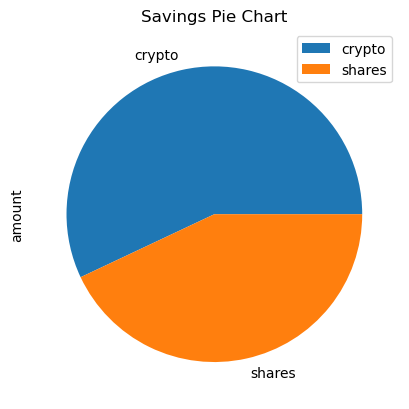

In [17]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings_data.plot.pie(y="amount", title="Savings Pie Chart")

In [18]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = btc_value + eth_value + my_spy_value + my_agg_value

# Validate saving health
# YOUR CODE HERE!
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your emergency fund goal.")
else:
    difference = emergency_fund - total_savings
    print(f"You are ${difference} away from reaching your emergency fund goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [20]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [95]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
# Set the tickers
tickers = ["AGG", "SPY"]

df_stock_data_five_years = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
df_stock_data_five_years
# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_stock_data_five_years[df_stock_data_five_years['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data_five_years[df_stock_data_five_years['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data_five_years = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data_five_years.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                     SPY                  \
                            volume        vwap     close    high     low   
timestamp                                                                  
2016-05-02 04:00:00+00:00  3608552  110.626939  207.9700  208.18  206.41   
2016-05-03 04:00:00+00:00  3128774  110.864495  206.1592  206.80  205.28   
2016-05-04 04:00:00+00:00  3096337  110.877983  205.0100  205.85  204.42   
2016-05-05 04:00:00+00:00  3052967  111.030002  204.9700  205.98  204.47   
2016-05-06 04:00:00+00:00  2922700  111.027631  205.7200  205.77  203.88   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00      263586  206.92   64747229  207.305695  
2016-05-03 04:00:00+00:00      377523  206.52  108050343  206.309997  
2016-05-04 04:00:00+00:00      345266  204.99   94995641  205.086315  
2016-05-05 04:00:00+00:00      280626  205.56   68425268  205.140615  
2016-05-06 04:00:00+00:00      340162  204.06   90999800  204.943796

In [101]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
from MCForecastTools import MCSimulation
MC_thirty_years = MCSimulation(
    portfolio_data = df_stock_data_five_years,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*30
)



In [105]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty_years.portfolio_data.head()

AGG                                          \
                             close      high       low trade_count    open   
timestamp                                                                    
2016-05-02 04:00:00+00:00  110.605  110.7400  110.5200       15122  110.74   
2016-05-03 04:00:00+00:00  110.810  110.9450  110.7500       15663  110.89   
2016-05-04 04:00:00+00:00  110.860  110.9315  110.7595       13984  110.91   
2016-05-05 04:00:00+00:00  111.140  111.1600  110.8010       15708  110.92   
2016-05-06 04:00:00+00:00  110.970  111.1200  110.9700       12697  111.12   

                                                                  SPY          \
                            volume        vwap daily_return     close    high   
timestamp                                                                       
2016-05-02 04:00:00+00:00  3608552  110.626939          NaN  207.9700  208.18   
2016-05-03 04:00:00+00:00  3128774  110.864495     0.001853  206.1592  206.80   
2016-05-04 04:00:00+00:00  3096337  110.877983     0.000451  205.0100  205.85   
2016-05-05 04:00:00+00:00  3052967  111.030002     0.002526  204.9700  205.98   
2016-05-06 04:00:00+00:00  2922700  111.027631    -0.001530  205.7200  205.77   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2016-05-02 04:00:00+00:00  206.41      263586  206.92   64747229  207.305695   
2016-05-03 04:00:00+00:00  205.28      377523  206.52  108050343  206.309997   
2016-05-04 04:00:00+00:00  204.42      345266  204.99   94995641  205.086315   
2016-05-05 04:00:00+00:00  204.47      280626  205.56   68425268  205.140615   
2016-05-06 04:00:00+00:00  203.88      340162  204.06   90999800  204.943796   

                                        
                          daily_return  
timestamp                               
2016-05-02 04:00:00+00:00          NaN  
2016-05-03 04:00:00+00:00    -0.008707  
2016-05-04 04:00:00+00:00    -0.005574  
2016-05-05 04:00:00+00:00    -0.000195  
2016-05-06 04:00:00+00:00     0.003659

In [176]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
import warnings
warnings.filterwarnings('ignore')

MC_thirty_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996767,1.003071,1.000374,1.002348,0.998665,1.006818,1.000591,1.006638,0.993881,0.999760,...,0.995859,1.010549,0.998488,1.000942,1.000922,1.005770,1.001288,0.998790,0.999453,0.995788
2,0.989615,1.002009,1.005272,1.011275,0.994329,1.006336,1.001738,1.006564,0.996913,0.997192,...,0.997939,1.012065,0.997957,1.001793,1.015672,1.006636,1.000733,1.001299,1.004800,0.999702
3,0.988801,1.002629,1.013751,1.006936,1.004208,1.002933,0.997661,1.003240,1.000220,0.993135,...,0.993977,1.012777,0.992439,1.006499,1.008336,1.002243,0.995542,1.005444,1.003869,1.002307
4,0.980220,1.004610,1.018206,1.009120,1.008955,1.001558,1.000359,1.012788,0.998753,0.996328,...,0.988523,1.010728,0.990649,1.002480,1.003429,1.008582,0.983918,1.005699,1.007532,1.011717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,5.477499,23.648430,12.332680,3.504640,4.197538,7.830167,7.629770,11.173378,24.324509,5.958289,...,8.929159,3.299322,4.011588,6.322772,6.255485,9.831512,4.172983,6.719532,5.995821,6.540203
7557,5.502628,23.457094,12.371996,3.524035,4.192648,7.781979,7.663513,11.193335,24.249237,5.924626,...,8.938020,3.286006,3.982429,6.267782,6.257874,9.856351,4.200926,6.711397,6.028175,6.527828
7558,5.463441,23.473396,12.483671,3.490525,4.174757,7.843229,7.626775,11.097132,24.170312,5.896396,...,8.957758,3.320319,3.993286,6.251594,6.230693,9.853648,4.177392,6.692193,6.012858,6.551236
7559,5.466997,23.574022,12.521873,3.492844,4.148529,7.899171,7.653941,11.077860,23.990372,5.856797,...,8.949035,3.298003,3.941038,6.276079,6.250884,9.862588,4.132771,6.768803,6.009241,6.488781


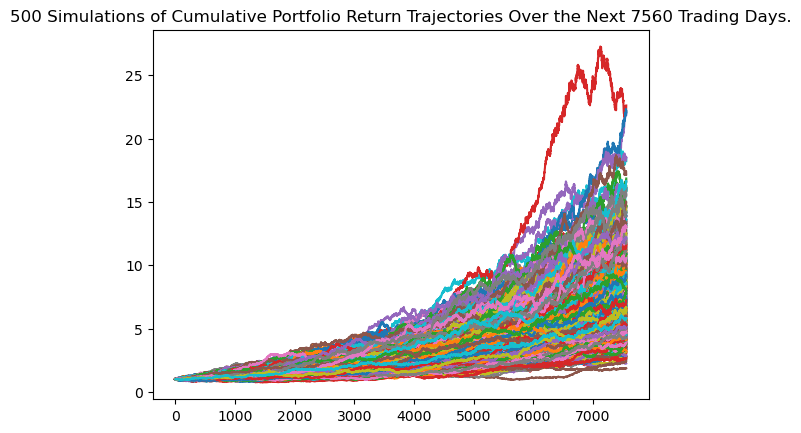

In [109]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirty_years.plot_simulation()

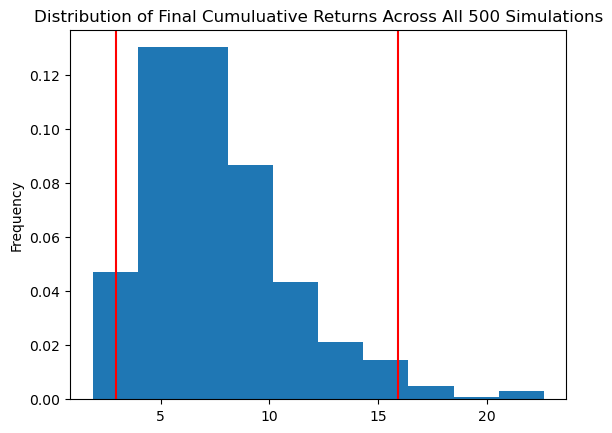

In [111]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirty_years.plot_distribution()

### Retirement Analysis

In [151]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
import pandas as pd
import numpy as np
summary_stats = MC_thirty_years.summarize_cumulative_return()
############################################################################
############################################################################
######### I cannot run the summarize_cumulative_return() function  #########
######### It throws:                                               #########
######### AttributeError: 'Series' object has no attribute 'append'#########
############################################################################
############################################################################

# Print summary statistics
#print(table)


AttributeError: 'Series' object has no attribute 'append'

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [162]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'ci_lower' is not defined

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [157]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

NameError: name 'ci_lower' is not defined

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [164]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_years = MCSimulation(
    portfolio_data = df_stock_data_five_years,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [178]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004822,0.988763,1.005081,1.006448,1.005882,1.001263,0.991850,0.996791,0.992667,1.000255,...,1.006246,1.000917,0.996683,0.997510,1.007286,0.992008,0.994014,0.996733,0.992128,0.997643
2,1.004447,0.987710,1.013257,1.006108,1.003755,1.002801,0.991276,0.994631,0.999841,0.997759,...,1.005091,0.999156,0.993487,1.004716,1.003158,0.992963,0.995849,0.996129,1.002949,0.991625
3,1.014915,0.991923,1.012197,1.004122,0.994279,1.002991,0.986450,0.986743,1.003138,1.002823,...,1.004349,0.986598,0.993580,1.006858,1.003895,0.990038,0.999728,0.998254,1.004410,0.996239
4,1.018885,1.001531,1.010960,1.003905,1.007061,1.005091,0.991885,0.993851,0.996610,0.996979,...,0.996851,0.983793,0.992510,1.000279,1.005055,0.992354,1.001670,0.994739,1.005342,0.997752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.496788,1.660575,1.399166,1.178616,1.292818,1.795364,1.212886,1.125329,1.614146,1.297810,...,1.481321,1.236183,1.180755,1.196095,1.661969,1.677847,0.993829,1.356809,1.308899,1.556631
1257,1.490222,1.670755,1.412426,1.182542,1.291871,1.807075,1.209253,1.135479,1.618837,1.300664,...,1.478344,1.234707,1.186807,1.203868,1.676339,1.683742,1.001626,1.363313,1.314559,1.545648
1258,1.487968,1.663480,1.410185,1.180488,1.286857,1.796521,1.201438,1.132824,1.621721,1.290808,...,1.472346,1.239150,1.190868,1.197924,1.675927,1.694573,1.001292,1.364784,1.311798,1.548491
1259,1.490327,1.667294,1.406848,1.181220,1.279059,1.817809,1.203640,1.131506,1.626142,1.287759,...,1.462232,1.229792,1.187875,1.206752,1.675110,1.676508,1.001224,1.359032,1.306871,1.555968


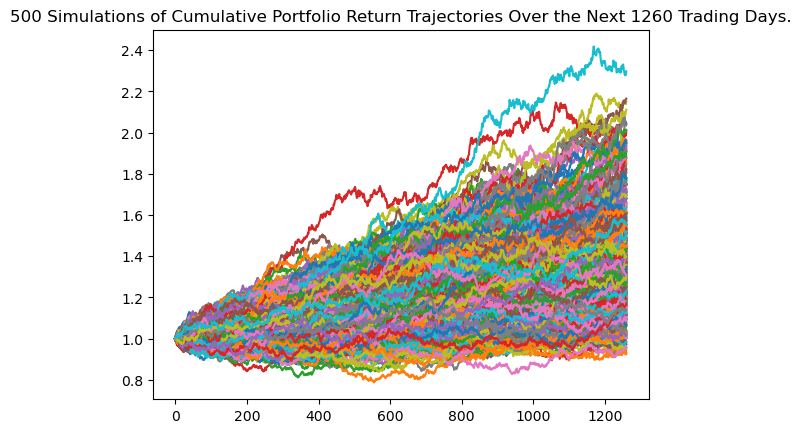

In [168]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_five_years.plot_simulation()


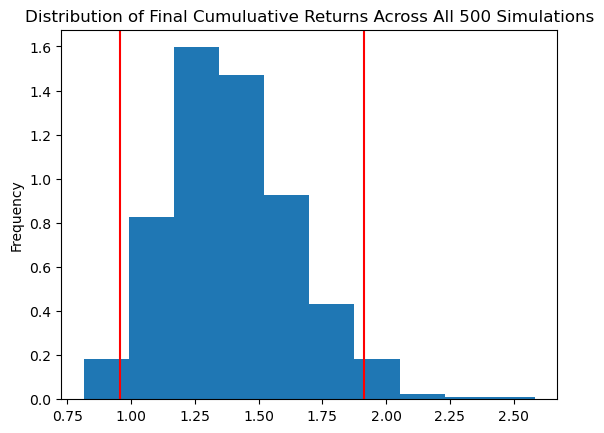

In [180]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_five_years.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [172]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_years = MCSimulation(
    portfolio_data = df_stock_data_five_years,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*10
)

In [182]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_years.calc_cumulative_return()


Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.998831,1.000917,0.994453,1.000383,1.008422,1.004179,1.005670,1.010123,0.997862,0.993818,...,1.003657,1.001128,1.010380,1.002335,1.004625,0.997564,0.994147,0.997944,0.996472,1.005219
2,0.994309,1.010247,0.985892,0.996128,1.005847,0.996556,1.003505,1.023201,0.995025,0.985679,...,1.000879,1.002475,1.002996,0.998884,1.004832,1.000295,0.998070,1.000050,1.006772,1.001866
3,0.991362,1.008780,0.985188,0.996918,1.002643,0.993631,1.000638,1.013694,0.998020,0.984878,...,1.001377,0.996689,1.003758,0.998931,1.003063,0.990447,0.991482,1.003417,1.004385,1.006066
4,0.994047,1.008120,0.991762,0.996883,0.995931,0.997274,0.992565,1.021101,0.993478,0.982205,...,0.997578,0.998493,1.005699,1.005256,1.004786,0.994827,0.986370,1.003802,1.005206,1.002096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.756467,2.452744,1.493100,1.396672,1.626798,2.844673,2.232403,2.093701,2.023743,1.791198,...,1.940426,2.077960,2.939270,1.995913,1.943155,1.545805,2.219803,1.467623,2.221376,3.002548
2517,1.749444,2.435223,1.502709,1.401391,1.628160,2.826189,2.234748,2.081308,2.017206,1.809839,...,1.951959,2.082617,2.910869,1.997857,1.942162,1.546019,2.209506,1.469511,2.228864,2.991347
2518,1.745849,2.428246,1.504917,1.403991,1.631464,2.815403,2.232430,2.072806,2.009028,1.815414,...,1.951774,2.087348,2.919104,2.004127,1.938706,1.539596,2.201031,1.470468,2.220112,2.978422
2519,1.751479,2.438456,1.501166,1.410683,1.634836,2.797397,2.229692,2.075147,2.008672,1.816190,...,1.958121,2.102921,2.902745,2.010561,1.948676,1.535277,2.201158,1.479329,2.208407,2.977129


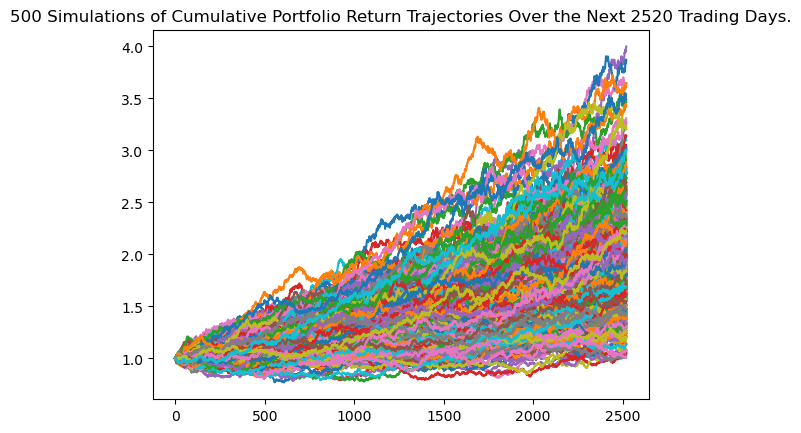

In [184]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_ten_years.plot_simulation()

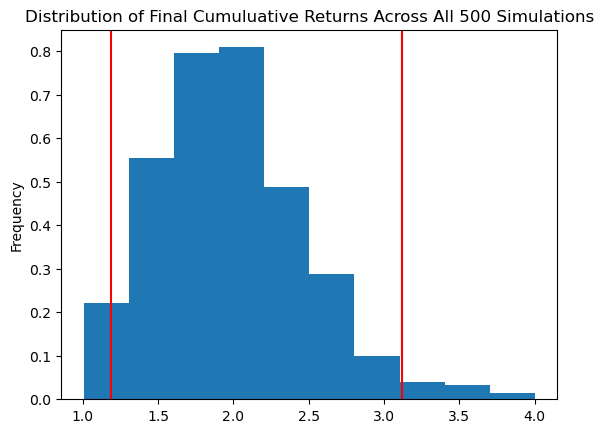

In [188]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_ten_years.plot_distribution()

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

In [ ]:


#~~~~~~~~~~~~~~~~~~~~~~~~~~~~   Please Note:   ~~~~~~~~~~~~~~~~~~~~~~~~~~~~#
############################################################################
############################################################################
######### I cannot run the summarize_cumulative_return() function  #########
######### It throws:                                               #########
######### AttributeError: 'Series' object has no attribute 'append'#########
############################################################################
############################################################################